# Recurrent Neural Network

In [2]:
# block 1

# importing packages & libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

## Get IMdb data

In [3]:
# block 2

# reading and processing data
url = 'https://raw.githubusercontent.com/uditdoshi/natural-language-processing-1/main/data/IMDB%20Dataset.csv'
imdb_data = pd.read_csv(url)
imdb_data["sentiment"] = imdb_data["sentiment"].map({"positive": 1, "negative":0})

In [4]:
# block 3

# defining train and test data sets
imdb_train = imdb_data["review"].values[:25000]
imdb_test = imdb_data["review"].values[25000:]

imdb_train_labels = imdb_data["sentiment"].values[:25000]
imdb_test_labels = imdb_data["sentiment"].values[25000:]

In [5]:
# block 4

# checking train data
imdb_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## Hyperparameters

In [6]:
# block 5

# listing hyperparameters makes it easier to quickly test different combinations
# a shorter sentence than max_length it will be padded, longer sentences will be truncated
vocab_size = 10000
embedding_dim = 16
max_length = 120  

## Tokenize

In [7]:
# block 6

# defining tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(imdb_train)
word_index = tokenizer.word_index

# converting words to numbers and pad for the neural network to use as input
train_sequences = tokenizer.texts_to_sequences(imdb_train)
train_padded = pad_sequences(train_sequences, maxlen=120, truncating="post")

# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(imdb_test)
test_padded = pad_sequences(testing_sequences, maxlen=120, truncating="post")

### Simple RNN

In [8]:
# block 7

# creasting model
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.SimpleRNN(256),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               82176     
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
# block 8

# compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [10]:
# block 9

# training model
num_epochs = 10
history = model.fit(train_padded, imdb_train_labels, epochs=num_epochs, 
                    validation_data=(test_padded, imdb_test_labels), validation_steps=30)

Epoch 1/10
782/782 [==============================] - 112s 141ms/step - loss: 0.6980 - accuracy: 0.5138 - val_loss: 0.6851 - val_accuracy: 0.5333
Epoch 2/10
782/782 [==============================] - 113s 144ms/step - loss: 0.6327 - accuracy: 0.6386 - val_loss: 0.6828 - val_accuracy: 0.5579
Epoch 3/10
782/782 [==============================] - 111s 142ms/step - loss: 0.5912 - accuracy: 0.6840 - val_loss: 0.6555 - val_accuracy: 0.6106
Epoch 4/10
782/782 [==============================] - 112s 143ms/step - loss: 0.5506 - accuracy: 0.7257 - val_loss: 0.6015 - val_accuracy: 0.6950
Epoch 5/10
782/782 [==============================] - 111s 142ms/step - loss: 0.5053 - accuracy: 0.7676 - val_loss: 0.6196 - val_accuracy: 0.6649
Epoch 6/10
782/782 [==============================] - 112s 143ms/step - loss: 0.5163 - accuracy: 0.7572 - val_loss: 0.6447 - val_accuracy: 0.6727
Epoch 7/10
782/782 [==============================] - 109s 140ms/step - loss: 0.4782 - accuracy: 0.7875 - val_loss: 0.6370 -

### Make predictions on text samples

In [11]:
# block 10

# predicting on a positive sample
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

In [12]:
# block 11

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 170ms/step
[[0.604322]]


In [13]:
# block 12

# predicting on a negative sample
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

In [14]:
# block 13

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[0.5113582]]


### Plot Learning curves

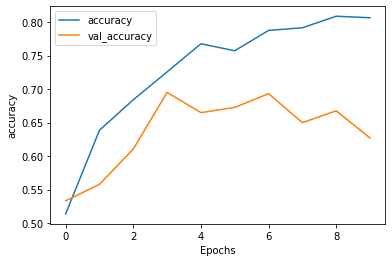

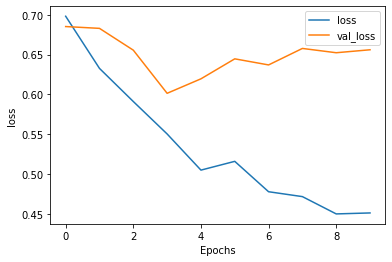

In [15]:
# block 14

# defining plot function
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
             
plot_graphs(history,'accuracy')
plot_graphs(history, 'loss')

## LSTM

In [16]:
# block 15

# creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 677,249
Trainable params: 677,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
# block 16

# compiling model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Train the model

In [18]:
# block 17

# training model
epochs_num = 5
history = model.fit(train_padded, imdb_train_labels, epochs=epochs_num,
                    validation_data=(test_padded, imdb_test_labels), 
                    validation_steps=30)

Epoch 1/5
782/782 [==============================] - 72s 89ms/step - loss: 0.5918 - accuracy: 0.6558 - val_loss: 0.4409 - val_accuracy: 0.8017
Epoch 2/5
782/782 [==============================] - 69s 89ms/step - loss: 0.3622 - accuracy: 0.8482 - val_loss: 0.3896 - val_accuracy: 0.8247
Epoch 3/5
782/782 [==============================] - 71s 91ms/step - loss: 0.2856 - accuracy: 0.8838 - val_loss: 0.3797 - val_accuracy: 0.8391
Epoch 4/5
782/782 [==============================] - 68s 87ms/step - loss: 0.2439 - accuracy: 0.9057 - val_loss: 0.3849 - val_accuracy: 0.8378
Epoch 5/5
782/782 [==============================] - 69s 88ms/step - loss: 0.2134 - accuracy: 0.9186 - val_loss: 0.4820 - val_accuracy: 0.8285


### Make predictions on text samples

In [19]:
# block 18

# predicting on a positive sample
sample_text_to_predict = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

In [20]:
# block 19

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 414ms/step
[[0.614709]]


In [21]:
# block 20

# predicting on a negative sample
sample_text_to_predict = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")


In [22]:
# block 21

# making prediction
prediction = model.predict(neg_padded)
print(prediction)

1/1 [==============================] - 0s 17ms/step
[[0.23893781]]


### Plot learning curves

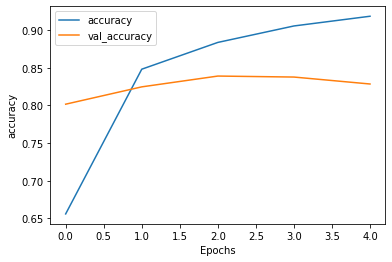

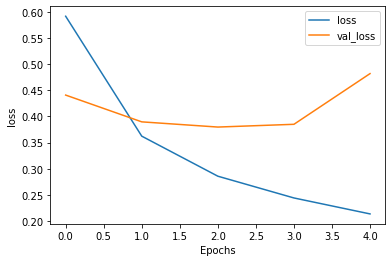

In [23]:
# block 22

# plotting loss and accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Experimenting the LSTM model

In [24]:
# block 23

# creating reviews
positive_review = ["The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."]
negative_review = ["The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]

### Test your models on the positive review

In [25]:
# block 24

# predicting on a positive review
train_sequences = tokenizer.texts_to_sequences(positive_review)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

In [26]:
# block 25

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[0.614709]]


### Test your models on the negative review

In [27]:
# block 26

# predicting on a negative review
train_sequences = tokenizer.texts_to_sequences(negative_review)
pos_padded = pad_sequences(train_sequences, maxlen=20, truncating="post")

In [28]:
# block 27

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[0.23893781]]
